# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 

* Νίκος Τσιλιβής, ΑΜ: 03114078
* Φοίβος Καλογιάννης, ΑΜ: 03114831

In [0]:
import pip
import numpy
import pandas
import nltk

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [0]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα μπορεί να βρει [εδώ](https://docs.google.com/spreadsheets/d/12AmxMqvjrc0ruNmZYTBNxvnEktbec1DRG64LW7SX4HA/edit?usp=sharing) τον μοναδικό  αριθμό της "Seed" από 1 έως 128. 

2. Το data frame `df_data_2` έχει 128 γραμμές (ομάδες) και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας από το Google Sheet.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [0]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 25 # 25

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [0]:
ID = 104
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])
print(type(corpus))

['The Student Prince in Old Heidelberg']
['"Romantic comedy",  "Silent film",  "Melodrama",  "Indie",  "Comedy-drama",  "Black-and-white",  "Drama",  "Comedy",  "Romance Film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="50%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import string
stem_corpus = []
for movie in corpus:
  words = [SnowballStemmer("porter").stem(word.lower().translate({ord(c): None for c in string.punctuation})) for word in movie.split()] #stemming and punctuation removal
  stem_corpus.append(" ".join(words))

In [0]:
#from google.colab import files ## Run this cell only if in colab environment

#uploaded = files.upload()

#for fn in uploaded.keys():
  #print('User uploaded file "{name}" with length {length} bytes'.format(
      #name=fn, length=len(uploaded[fn])))

In [0]:
df = pd.read_excel('../input/SSA_Names_DB.xlsx', sheet_name=None) ## path refers to a kaggle environment

In [0]:
names = [word.lower() for word in list(df['Sheet1']['Name'][0:2000])] 

In [0]:
print(stem_corpus[55])

chandu and suri rajendra prasad are pilot and thick friend indu and padma kasthuri are veri good friend chandu get marri to indu and suri marri padma indu and padma becom pregnant indu meet with a car accid and she becom infertil padma give birth to twin ram and lakshman indu and chandu adopt ram after three year lakshman is infect by cancer he need to undergo bone marrow transplant indu refus and flee with ram to delhi fear that chandu will forc her to send ram for oper later on she realiz her mistak and board a flight to return to her husband so that ram can be oper upon pakistani milit hijack the flight and they divert the flight rout lakshman is on hi deathb how chandu rescu the flight passeng and put an end to the stori form the climax there is a bit of plagiar subplot from the god must be crazi


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words=names, min_df=5, max_df=0.7, sublinear_tf=True)
corpus_tf_idf = vectorizer.fit_transform(stem_corpus)
corpusA_tf_idf = corpus_tf_idf.toarray()# 1st change: fit_transform is more efficiently implemented

In [0]:
print(corpusA_tf_idf.shape)
print(vectorizer.get_feature_names())
np.where(~corpusA_tf_idf.any(axis=1))[0]

(5000, 8923)
['10', '100', '1000', '10000', '100000', '10th', '10yearold', '11', '11yearold', '12', '12th', '12yearold', '13', '13th', '13yearold', '14', '14th', '14yearold', '15', '150', '15th', '15yearold', '16', '16th', '16yearold', '17', '17th', '17yearold', '18', '1870', '1880', '1890', '18th', '18yearold', '19', '1900', '1910', '1912', '1914', '1917', '1918', '1920', '1923', '1924', '1927', '1928', '1929', '1930', '1931', '1933', '1935', '1936', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1949', '1950', '1953', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1998', '1999', '19th', '19yearold', '1st', '20', '200', '2000', '20000', '200000', '2001', '2002', '2003', '2004', '2005', '2006', '200

array([], dtype=int64)

## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)


In [0]:
import scipy as sp

def content_recommender(target_movie, max_recommendations):
  N = corpusA_tf_idf.shape[0] # number of different movies
  similarities = np.zeros(N)
  
  target_descr = corpusA_tf_idf[target_movie] 
  for i in range(N):
    similarities[i]= 1 - sp.spatial.distance.cosine(corpusA_tf_idf[i],target_descr)
  best_movies = (-similarities).argsort()
  
  print("***The movie's name is: *** ")
  print(titles[target_movie])
  print("It belongs in the following categories: ")
  print(categories[target_movie])
  print("The movie's plot is: \n" + corpus[target_movie])
  print("The " + str(max_recommendations) + " best recommendations are: ")
  for i in range(max_recommendations):
    rec = best_movies[i+1] # ignore the 1st
    print(rec)
    print("Recommendation movie Number " + str(i+1) + " is: ")
    print(titles[rec])
    print("It belongs in the following categories: ")
    print(categories[rec])
    print("The movie's plot is: \n" + corpus[rec])

## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

# Προτάσεις ταινιών
Για τα ακόλουθα ids ταινιών λαμβάνουμε καλά αποτελέσματα προτάσεων: <br>

| ID            | Τίτλος | Θεματική      |
| ------------- |:-------------:| 
| 2  | Yaadon Ki Kasam |action, starring actor: Mithun Chakraborty|
| 3  | Tomcats| centered      |
| 25 |  Enigma| war, ww2, german, agents, boats |
| 53 | The Musketeers of Pig Alley | gang, robbery |
|111 | Husbands Beware |  Διαφορετικά επεισόδια σειράς |
| 256| Ghidorah, the Three-Headed Monster |godzilla, destroy |
| 701| Fright Night | fright night, vampire |
|3310| Tora-san's Shattered Romance | Tora-san movies series |
|4082| Hell Boats | war, sea, boats, submarines|           

In [0]:
content_recommender(2, 5)

***The movie's name is: *** 
['Yaadon Ki Kasam']
It belongs in the following categories: 
['"World cinema",  "Musical",  "Drama",  "Romance Film",  "Action",  "Bollywood"']
The movie's plot is: 
Yaadon Ki Kasam is an action film starring Mithun Chakraborty and Zeenat Aman along with Shakti Kapoor and Asrani, supported by Madan Puri.
The 5 best recommendations are: 
404
Recommendation movie Number 1 is: 
['Karm Yudh']
It belongs in the following categories: 
['"Action"']
The movie's plot is: 
Karm Yudh is an action film in starring Mithun Chakraborty in lead role supported by Asha Sachdev, Anita Raj and Amrish Puri.
3299
Recommendation movie Number 2 is: 
['Hum Intezaar Karenge']
It belongs in the following categories: 
['"Romantic drama",  "Romance Film",  "Drama",  "World cinema"']
The movie's plot is: 
Hum Intezaar Karenge is an action drama, featuring Mithun Chakraborty and Padmini Kolhapure in lead roles, well supported by Vinod Mehra, Jagdeep, Shakti Kapoor, Vinod Mehra and Shafi 

In [0]:
content_recommender(3, 5)

***The movie's name is: *** 
['Tomcats']
It belongs in the following categories: 
['"Romantic comedy",  "Romance Film",  "Screwball comedy",  "Comedy"']
The movie's plot is: 
The story concerns a group of guys who have made a deal to each invest in a fund, which would be paid to the last remaining bachelor of the group. Michael Delaney, a cartoonist, attempts to get the other remaining bachelor, Kyle Brenner, married to a statuesque policewoman who Kyle said was the one that got away, so Michael can claim the fund to pay off a gambling debt. Unfortunately, the statuesque policewoman Kyle is trying to marry is the woman Michael has fallen in love with, Officer Natalie Parker. Michael then gets himself into all sorts of misadventures, from getting captured by a young woman and her grandmother with a bizarre BDSM fetish  to trying to retrieve Kyle's surgically removed testicle, all the while attempting to pay off his gambling debt to the honked-off mobster menacing through selling his pos

In [0]:
content_recommender(25, 5)

***The movie's name is: *** 
['Enigma']
It belongs in the following categories: 
['"Thriller",  "Film adaptation",  "Mystery",  "Period piece",  "Drama",  "War film",  "Romance Film",  "Spy"']
The movie's plot is: 
The story, loosely based on actual events, takes place in March 1943, when World War II was at its height. The cryptanalysts at Bletchley Park, Buckinghamshire, have a problem: the Nazi U-boats have changed one of their code reference books used for Enigma machine ciphers, leading to a blackout in the flow of vital naval signals intelligence. The British cryptanalysts have cracked the "Shark" cipher once before, and they need to do it again in order to keep track of U-boat locations. The film begins with Jericho returning to Bletchley after a month recovering from a nervous breakdown brought on by his failed love affair with Claire. Jericho immediately tries to see her again and finds that she mysteriously disappeared a few days earlier. He enlists the help of Claire's house

In [0]:
content_recommender(53, 5)

***The movie's name is: *** 
['The Musketeers of Pig Alley']
It belongs in the following categories: 
['"Crime Fiction",  "Silent film",  "Gangster Film",  "Indie",  "Black-and-white",  "Short Film",  "Drama"']
The movie's plot is: 
The film is about a poor married couple living in New York City. The husband works as a musician and must travel often for work. When returning, his wallet is taken by a gangster. His wife goes to a ball where a man tries to drug her, but his attempt is stopped by the same man who robbed the husband. The two criminals become rivals, and a shootout ensues. The husband gets caught in the shootout and recognizes one of the men as the gangster who took his money. The husband sneaks his wallet back and the gangster goes to safety in the couple's apartment. Policemen track the gangster down but the wife gives him a false alibi.
The 5 best recommendations are: 
4288
Recommendation movie Number 1 is: 
['Double Deal']
It belongs in the following categories: 
['"Crim

In [0]:
content_recommender(111, 5)

***The movie's name is: *** 
['Husbands Beware']
It belongs in the following categories: 
['"Short Film",  "Comedy",  "Black-and-white"']
The movie's plot is: 
Moe and Larry marry Shemp's overweight sisters , and discover to their horror after the vows that the girls are a couple of battle axes. After being kicked out from their place, the new bridegrooms vow revenge on Shemp for introducing them. Later, Shemp has a voice lesson with student, Fanny Dinkelmeyer since he is a music teacher. He then discovers that he has to marry a woman within seven hours to receive $500,000 from his dead Uncle's will. After some searching, the Stooges finally find Shemp's student, Ms. Dinkelmeyer. Several of Shemp's old girlfriends, and gold diggers, all arrive at the Justice of the Peace's office, wreaking havoc in an attempt to marry Shemp for his money. But Shemp weds the harridan, just under the deadline, and then discovers that there is no dead Uncle or will, and that everything was Moe's and Larry

In [0]:
content_recommender(256, 5)

***The movie's name is: *** 
['Ghidorah, the Three-Headed Monster']
It belongs in the following categories: 
['"Science Fiction",  "Horror",  "World cinema",  "Cult",  "Fantasy",  "Monster",  "Japanese Movies"']
The movie's plot is: 
Police Detective Shindo  is assigned to guard Princess Selina Salno of Selgina  during the Princess' visit to Japan, due to a suspected assassination plot. Although Shindo is smitten with Selina's photograph, her plane never makes it to Japan, as it is destroyed by a bomb en route. At exactly the same time a meteorite shower draws the attention of Professor Murai , who along with his team of scientists strikes out into the wilderness to examine the largest of the meteors, which has magnetic properties. To Shindo's surprise, the supposedly deceased Selina turns up in Japan, without her royal garb , claiming to be from the planet Mars, and preaching to skeptical crowds of forthcoming disaster. To their surprise however, her prophecies begin coming true. Firs

In [0]:
content_recommender(701, 5)

***The movie's name is: *** 
['Fright Night']
It belongs in the following categories: 
['"Cult",  "Thriller",  "Horror",  "Comedy",  "Teen"']
The movie's plot is: 
Charley Brewster  is a huge fan of traditional Gothic horror films. He stays up late at night to watch the horror movie TV series "Fright Night" hosted by Charley's hero, Hammer Horror style actor Peter Vincent , who played a vampire killer for many years in horror movies. Charley discovers that his new next door neighbor, Jerry Dandridge  is a vampire. Upon coming to this terrible realization, Charley tries to tell his naturally skeptical yet loving mother, and asks his friends for their help. In desperation he calls the police but when he reveals his suspicions to them they believe he has a wild imagination and ignore his claims. That night Charley gets a visit from Jerry himself who offers Charley a "choice" : "Forget about me and I'll forget about you." Charley tries to use his crucifix on Jerry but the latter stops him 

In [0]:
content_recommender(3310, 5)

***The movie's name is: *** 
["Tora-san's Shattered Romance"]
It belongs in the following categories: 
['"Japanese Movies"']
The movie's plot is: 
A girl who has escaped from an institution falls in love with Tora-san. He decides to marry her, but his family and the girl's teacher break up the romance.<ref name  http://www.kinejun.jp/cinema/id/19438|title2010-01-18|languageKinema Junpo}}
The 5 best recommendations are: 
1009
Recommendation movie Number 1 is: 
["Tora-san's Love in Osaka"]
It belongs in the following categories: 
['"Japanese Movies"']
The movie's plot is: 
When his travels bring him to Osaka, Tora-san falls in love with a local geisha. He helps her to track down her estranged brother, and informs his family that he plans to marry her. His plans are foiled when the geisha informs Tora-san that she is engaged.<ref name  http://www.kinejun.jp/cinema/id/17080|title2010-01-21|languageKinema Junpo}}<ref name Stuart |last Stuart Galbraith IV|urlTora-san 27: Tora-san's Many-spli

In [0]:
content_recommender(4082, 5)

***The movie's name is: *** 
['Hell Boats']
It belongs in the following categories: 
['"Adventure",  "Combat Films"']
The movie's plot is: 
In 1941 Lt. Commander Jeffords, an American serving with the Royal Navy is assigned to Valletta, Malta to command a flotilla of Motor Torpedo Boats for a top secret mission. Jeffords is granted permission to take his friend Chief Petty Officer Yacov, a Palestinian with him. Through scrounging spare parts from sunken craft, the battered flotilla is able to piece together three seaworthy craft. Jeffords' mission is to destroy a former Italian submarine base in Augusta, Sicily that now contains the German's Fritz X glide bombs that have been taking a heavy toll of British shipping. As the bombs are stored in former submarine pens tunnelled inside a mountain, an aerial attack is unfeasibile. It is up to Jeffords to determine how he will accomplish his mission. Off duty Jeffords meets a woman bathing in the nude who turns out to be the wife of his comma

# Βελτιστοποίηση

Στο σύστημα που υλοποιήσαμε αρχικός στόχος ήταν να μικρύνουμε σημαντικά τον αριθμό των features. Για τον λόγο αυτό κάναμε χρήση των παραμέτρων της **fit_transform()** min_df, max_df και stop_words: 
* min_df: Ορίζει ένα κατώφλι εμφάνισης λέξεων, κάτω απ' το οποίο μια λέξη "κόβεται" απ' το λεξικό. Θέσαμε αρχικά την τιμή αυτή 2 και προοδευτικά είδαμε πως μέχρι την τιμή 5, η ποιότητα των συστάσεων ταινιών παραμένει σταθερή, ενώ η ποσότητα των features μειώνεται σημαντικά, γεγονός που είναι λογικό, καθώς σε ένα τόσο μεγάλο corpus τα ορθογραφικά και τυπογραφικά λάθη είναι συνηθισμένα. Χαρακτηριστικά να αναφέρουμε πως απ' την τιμή 1 (default) στην τιμή 3 του min_df, σημειώθηκε μείωση της τάξης των 15k features. 
* max_df: Ορίζει ένα ανώφλι εμφάνισης λέξεων, πάνω απ' το οποίο μια λέξη κόβεται απ' το λεξικό. Μέσω αυτής της παραμέτρου προσπαθήσαμε να κάνουμε μια λεπτομερή ανάλυση στα κειμενά μας, δηλαδή να αγνοήσουμε τις λέξεις που έχουν μεγάλη συχνότητα εμφάνισης για καλύτερη σημασιολογική αναπαράσταση της κάθε ταινίας (corpus specific stop words). Λίγες δοκιμές έδειξαν πως μια τιμή γύρω στο 0.7 φαίνεται να βελτιώνει τις προτάσεις ταινιών, αφού απορρίπτει συνδετικές λέξεις, λέξεις συχνές στην περιγραφή μιας ταινίας (πχ "plot", "character", "film"), ενώ δεν απορρίπτει πλήρως κάποιες λέξεις που ναι μεν έχουν συχνή εμφάνιση, αλλά πιθανώς να φέρουν κάποια πληροφορία για τον σημασιολογικό διαχωρισμό δύο ταινιών (πχ "kills", "marry", "boyfriend"), αφήνοντας έτσι την td_idf αναπαράσταση να "τιμωρήσει" τις λέξεις αυτές με μικρά, αλλά όχι μηδενικά βάρη.
* stop_words: Δεδομένου του max_df και των προβλημάτων που φαίνεται να περιέχουν τα predefined stop words της αγγλικής γλώσσας (βλ. documentation του tdidf vectorizer), επιλέξαμε τα stop words μας να αποτελούνται απ' τα 2000 πιο συνηθισμένα μικρά αγγλικά ονόματα (σύμφωνα με την [βάση](https://data.world/len/us-first-names-database) δεδομένων που επιλέξαμε). Κίνητρο για την επιλογή αυτή ήταν η παρατήρηση στο αρχικό στάδιο της βελτιστοποιήσης του recommender μας πως συνέδεε σημασιολογικά ταινίες που τύχαινε να έχουν ίδιο όνομα πρωταγωνιστή-χαρακτήρα, το οποίο εμφανιζόταν συχνά χώρις άλλη θεματική που να τις ενώνει. Σύμφωνα με την κρίση μας, το όνομα των χαρακτήρων σε μια ταινία δεν φέρει πληροφορία, παρά μόνο αν το όνομα αυτό είναι ιδιαίτερο σπάνιο που μπορεί να υποδηλώνει ανίχνευση ενός sequel μια ταινίας ή ιστορικό πρόσωπο (πχ. "Cleopatra"). Για τον λόγο αυτό περιορίσαμε τον αριθμό των ονομάτων που θεωρήσαμε ως stop words.

Τέλος, προτού να εισάγουμε το corpus στον vectorizer, πραγματοποιήσαμε stemming της κάθε λέξης μέσω του SnowballStemmer και ταυτόχρονα αφαίρεση του punctuation των λέξεων. Προσπαθήσαμε μέσω αυτού να συνδέσουμε με ένα feature πολλαπλές εμφανίσεις της ίδια έννοιας, που όμως διέφεραν μορφολογικά (πχ "play", "playing", "player") και ταυτόχρονα να επιτύχουμε και μείωση των features. Φαίνεται να επιτύχαμε και στα 2, μιας οι συστάσεις βελτιώθηκαν και τα features μειώθηκαν κατά 5k περίπου. Σημείωση: To stemming και η αφαίρεση της στίξης έγινε εξωτερικά του vectorizer (παρ' όλο που προσφέρει την δυνατότητα να πάρει όρισμα μία user-defined συνάρτηση που τα πραγματοποιεί αυτά), ώστε να μην γίνεται κάθε φορά που αλλάζουμε τις υπόλοιπες παραμέτρους και να γλυτώνουμε χρόνο κατά την βελτιστοποίηση του recommender μας.

## Tip: persistence αντικειμένων με joblib.dump

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
from sklearn.externals import joblib  
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα. Προσοχή: αυτό ισχύει μόνο στα Azure και Kaggle, στο Colab και στο IBM τα αρχεία εξαφανίζονται όταν ανακυκλώνεται ο πυρήνας και θα πρέπει να τα αποθηκεύετε τοπικά. Περισσότερα στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing).

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [0]:
from sklearn.externals import joblib
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 

['corpus_tf_idf.pkl']



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [0]:
!ls -lh

total 192M
-rw-r--r-- 1 root root  199 Jan 17 22:07 __notebook_source__.ipynb
-rw-r--r-- 1 root root 7.3M Jan 18 00:36 corpus_tf_idf.pkl
-rw-r--r-- 1 root root 185M Jan 18 00:49 som.pkl


και μπορούμε να τα διαβάσουμε με `joblib.load`

In [0]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). 

Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της.

Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

Σημειώστε ότι το IBM Watson δείνει "Kernel dead" εάν δεν έχετε βελτιστοποιήσει το tfidf και μικρύνει τις διαστάσεις του dataset (πιθανότατα κάποια υπέρβαση μνήμης).

In [0]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [0]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [0]:
final_set.shape

(5000, 9245)

Με βάση την εμπειρία σας στην προετοιμασί των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

**Απάντηση**: Ο μεγάλος αριθμός των features πιθανώς μας παραπέμπει σε έναν μετασχηματισμό για μείωση της διάστασης (πχ. PCA, SVD, KLT κτλπ), ωστόσο αφενός η διαδικασία που θα ακολουθήσουμε στην συνέχεια αποτελεί μια γενικευμένη, μη γραμμική έκδοση της PCA [[1]](https://www.researchgate.net/publication/271642170_Principal_Manifolds_for_Data_Visualisation_and_Dimension_Reduction_LNCSE_58), αφετέρου φροντίζουμε, μέσω της δυνατότητας που μας παρέχει το somoclu, να αρχικοποιήσουμε τον χάρτη στις 2 πρωτεύουσες συνιστώσες των δεδομένων. Επίσης σκεφτήκαμε πως η προσαρμογή της κατανομής του κάθε feature σε μία κανονική κατανομή $N(0,1)$ να βελτίωνε την σημασιολογική ενοποίηση των δεδομένων, ωστόσο λίγα πειράματα που τρέξαμε σε αύτα τα δεδομένα δεν είχαν κάποιο αξιόπιστο αποτέλεσμα, όπως φαίνεται στο παρακάτω ενδεικτικό στιγμιότυπο ενός SOM που έχει γίνει train με τέτοια δεδομένα.

<img src="https://i.ibb.co/PCdw3dM/49997391-982790941914914-7065123822126497792-n.png" width="45%">

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [0]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

Requirement already up-to-date: somoclu in /opt/conda/lib/python3.6/site-packages (1.7.5)


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.


In [0]:
n_rows, n_columns = 15, 15 #we increased the number of neurons to 125=15x15
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False, initialization="pca")
%time som.train(final_set, epochs=100)

CPU times: user 43min 5s, sys: 3.1 s, total: 43min 8s
Wall time: 11min 7s


## Σχολιασμός επιλογών εκπαίδευσης 
Στα διαφορετικά πειράματα που κάναμε αλλάξαμε τον αριθμό των νευρώνων, την αρχικοποίηση του χάρτη, το είδος της γεωμετρίας του χάρτη (planar vs toroid) και την γεωμετρία του grid (rectangular vs hexagonal). Παρατηρήσαμε τα εξής:
* Αύξηση του αριθμού των νευρώνων πάνω από 20x20 δεν φαίνεται να δούλευε σωστά (φροντίζαμε βέβαια να προσαρμόζουμε κατάλληλα το k του k-means), γι' αυτό και κρατήσαμε το 15x15, που έκανε καλύτερο διαχωρισμό των κατηγοριών.
* Παρατηρήσαμε μεγαλύτερα και πιο συμπαγή clusters με αρχικοποιήση του χάρτη με τις 2 πρώτες πρωτεύουσες συνιστώσες, παρά με την τυχαία αρχικοποίηση, παρ' όλο που στην βιβλιογραφία αναφέρετε πως για μη γραμμικά διαχωρίσιμα δεδομένα (όπως, υποθέτουμε με αρκετή βεβαιότητα, είναι το δικό μας) η τυχαία αρχικοποίηση δουλεύει καλύτερα [[2]](https://www.researchgate.net/publication/283768202_SOM_Stochastic_initialization_versus_principal_components).
* Η αλλαγή του χάρτη σε τόρο, ενώ περιμέναμε να συσχετίσει καλύτερα τα δεδομένα, αφού πλεόν το κάθε σημείο αποκτά περισσότερους γείτονες, στην πραγματικότητα παρείχε χειρότερα clusters.  Μια πιθανής εξήγηση φαίνεται να' ναι πως το SOM θεωρεί αρκετές κατηγορίες , αρκετά απομακρυσμένες μεταξύ τους (πχ "Horror"-"Comedy", "Family"-"Thriller/Crime"), με αποτέλεσμα μια τοροειδής γεωμετρία να αδυναμεί να τα διαχωρίσει σε ικανοποιητικό βαθμό.
* Τέλος, δοκιμάσαμε και εξαγωνικούς χάρτες, οι οποίοι για άγνωστο σε μας λόγο, μπέρδευαν αρκετές κατηγορίες μεταξύ τους.

Τελικά, κρατήσαμε 15x15 νευρώνες και PCA αρχικοποίηση.


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [0]:
bmus = som.bmus
print(bmus.shape)
print(bmus)

ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)
print(indices.shape)

(5000, 2)
[[ 7  5]
 [ 1  0]
 [ 3 14]
 ...
 [13 10]
 [ 9  3]
 [ 6  5]]
(199, 2)
(5000,)



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [0]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters=45)
som.cluster(algorithm=algorithm)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.



## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

[//]: # (Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:)

[//]: # (<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">)
[//]: # (<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">)



[[ 1  1 14 14 14  9  9  9 20 20 20 17 17 17 17]
 [ 1  1 14 14 14  9  9  9 20 20 20 17 17 17 38]
 [18 18 18 14 14 36 36 36 19 19 19 24 24 38 38]
 [18 18 18 18 27 27 36 36 19 19 19 28 28 38 10]
 [18 18 18 18 27 27 27  2  2 19 34 28 28 28 10]
 [18 18 16 15 15 27  2  2  2 34 34 34 28  0  0]
 [16 16 16 15 15 15  2  2  2 34 34 22 22  0  0]
 [16 16 16 11 15 13 13  2  2 37 44 22 22  0  0]
 [16 39 11 11 43 13 13 13  3 37 44 44 44  8  8]
 [ 5 39 39 43 43 26 13 21  3  3 44 35 35  8  8]
 [ 5 39 39 43 26 26 26 21 21 21 25 35 23 23 23]
 [ 6  6 29 29 29 26 26 21 21 21 25 25 25 32 32]
 [ 6  6  6 29 29 42 42  4  4  4 40 40 40 32 32]
 [33 33 30 41 41 41  4  4  4  4 31 40 31  7  7]
 [33 33 30 12 41 41  4  4  4  4 31 31  7  7  7]]


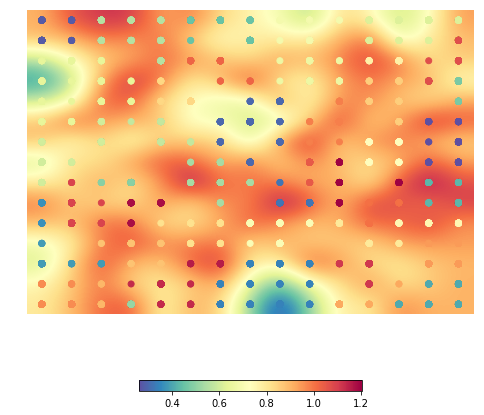

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [0]:
joblib.dump(som, "som.pkl")

print(som.clusters)
som.view_umatrix(bestmatches=True, colorbar=True)

In [0]:
_, counts = np.unique(som.clusters, return_counts=True)
print("Clusters sorted by increasing number of neurons:")
print("Cluster index: " + str(np.argsort(counts)))
print("Number of neurons: " + str(np.sort(counts)))

Clusters sorted by increasing number of neurons:
Cluster index: [12 30 37 10  5 24 42 35  3 11 23 43 25  1 31 32 40 38  8 33 22 41 36 29
 39 44  6  7 26  9 13 34 15 20 28 27  0 21 19 17 16 14  2  4 18]
Number of neurons: [ 1  2  2  2  2  2  2  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  6  7  7  7  8  8 10 11 13]



## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [0]:
def print_categories_stats(ids):
  all_categories = []
  for id in ids:
    for cat in categories[id]:
      cur_list = [a.strip() for a in cat.split(",")]
      all_categories.extend(cur_list)
  
  a, counts = np.unique(all_categories, return_counts=True)
  freq_cats = list(zip(a, counts))
  freq_cats.sort(key=lambda tup: tup[1], reverse=True)
  print(freq_cats)

In [0]:
def neuron_movies_report(my_ubmus):
  movies_in_cluster = []
  for neuron in my_ubmus:
    cur_movies = np.where(indices == neuron)
    cur_movies = [item for l in cur_movies for item in l.tolist()]
    movies_in_cluster.extend(cur_movies)
  print_categories_stats(movies_in_cluster)
  
def print_cluster_neurons_movies_report(number):
  y, x = np.where(som.clusters == number)
  my_bmus = np.asarray(list(zip(y, x)))
  my_ubmus = []
  for neuron in my_bmus:
    search_in_ubmus = np.where((ubmus == neuron).all(axis=1))
    if (np.count_nonzero(search_in_ubmus) > 0):
      my_ubmus.append(np.asscalar(search_in_ubmus[0]))
  neuron_movies_report(my_ubmus)

In [0]:
#testing

print_cluster_neurons_movies_report(24)

[('"Drama"', 13), ('"Romance Film"', 13), ('"World cinema"', 13), ('"Comedy film"', 2), ('"Comedy"', 2), ('"Musical"', 2), ('"Period piece"', 2), ('"War film"', 2), ('"Apocalyptic and post-apocalyptic fiction"', 1), ('"Art film"', 1), ('"Avant-garde"', 1), ('"Biographical film"', 1), ('"Biography"', 1), ('"Coming of age"', 1), ('"Crime Fiction"', 1), ('"Experimental film"', 1), ('"Juvenile Delinquency Film"', 1), ('"Music"', 1), ('"Political drama"', 1), ('"Prison"', 1), ('"Romantic fantasy"', 1), ('"Science Fiction"', 1), ('"Short Film"', 1), ('"Time travel"', 1)]



## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.



Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


# Σχολιασμός τοπολογικών ιδιοτήτων του χάρτη

**1.**  Πράγματι γνωρίζουμε πως δεδομένα στον χώρο εισόδου έχουν ανάλογη πυκνότητα πιθανότητας στον χώρο εξόδου ( $p_{out}(x) = p_{in}^{\frac{2}{3}}(x)$ για την ακρίβεια) και κάτι τέτοιο αποτυπώθηκε στους χάρτες μας απ' τις πρώτες δοκιμές με λίγες ταινίες για τις κατηγορίες "Action/Adventure", "Comedy" και τις συγγενείς υποκατηγορίες τους. Στον τελικό χάρτη που παρουσιάζουμε, τα μεγαλύτέρα clusters, περιέχουν τις κατηγορίες αυτές.

In [0]:
print_cluster_neurons_movies_report(18) 

[('"Family Film"', 186), ('"Comedy"', 138), ('"Animation"', 85), ('"Adventure"', 80), ('"Children\'s/Family"', 53), ('"Fantasy"', 43), ('"Short Film"', 40), ('"Children\'s Fantasy"', 20), ('"Musical"', 19), ('"Children\'s"', 18), ('"Drama"', 18), ('"Science Fiction"', 17), ('"Family-Oriented Adventure"', 14), ('"Fantasy Comedy"', 12), ('"Animal Picture"', 9), ('"Slapstick"', 9), ('"Sports"', 9), ('"Action"', 8), ('"Computer Animation"', 8), ('"Adventure Comedy"', 7), ('"Comedy film"', 7), ('"Anime"', 5), ('"Christmas movie"', 5), ('"Holiday Film"', 5), ('"Japanese Movies"', 5), ('"Television movie"', 5), ('"World cinema"', 5), ('"Crime Fiction"', 4), ('"Music"', 4), ('"Teen"', 4), ('"Western"', 4), ('"Action/Adventure"', 3), ('"Animated cartoon"', 3), ('"Chinese Movies"', 3), ('"Coming of age"', 3), ('"Costume drama"', 3), ('"Fairy tale"', 3), ('"Fantasy Adventure"', 3), ('"Indie"', 3), ('"Musical comedy"', 3), ('"Mystery"', 3), ('"Period piece"', 3), ('"Romance Film"', 3), ('"Stop mot

In [0]:
print_cluster_neurons_movies_report(4)

[('"Action"', 208), ('"Action/Adventure"', 197), ('"Thriller"', 95), ('"Comedy"', 81), ('"Crime Fiction"', 47), ('"World cinema"', 47), ('"Martial Arts Film"', 45), ('"Chinese Movies"', 32), ('"Adventure"', 31), ('"Action Thrillers"', 30), ('"Drama"', 26), ('"Crime Thriller"', 19), ('"Fantasy"', 19), ('"Western"', 19), ('"Parody"', 17), ('"Science Fiction"', 17), ('"Spy"', 14), ('"Buddy film"', 13), ('"Horror"', 12), ('"Indie"', 12), ('"Action Comedy"', 11), ('"Crime Comedy"', 9), ('"Disaster"', 9), ('"Black comedy"', 8), ('"Sports"', 8), ('"Mystery"', 7), ('"Slapstick"', 7), ('"Superhero movie"', 7), ('"Suspense"', 7), ('"War film"', 7), ('"Black-and-white"', 6), ('"Heist"', 6), ('"Political thriller"', 6), ('"Airplanes and airports"', 5), ('"Animation"', 5), ('"Costume drama"', 5), ('"Family Film"', 5), ('"Glamorized Spy Film"', 5), ('"Japanese Movies"', 5), ('"Satire"', 5), ('"Comedy-drama"', 4), ('"Cult"', 4), ('"Blaxploitation"', 3), ('"Caper story"', 3), ('"Chase Movie"', 3), ('"

Αντιθέτως, κατηγορίες ταινιών με μικρή εμφάνιση όπως το "Bollywood", το "Short-film" και το "Anime" σε χάρτες με λιγότερες ταινίες έτειναν να ενσωματωθούν σε μεγαλύτερα clusters, ενώ στον χάρτη που παρουσιάζουμε καταφέρνουν να διαχωριστούν.

In [0]:
print_cluster_neurons_movies_report(10)

[('"Bollywood"', 57), ('"World cinema"', 57), ('"Drama"', 48), ('"Musical"', 45), ('"Thriller"', 8), ('"Art film"', 4), ('"Comedy"', 4), ('"Crime Fiction"', 4), ('"Action"', 3), ('"Action/Adventure"', 3), ('"Political drama"', 2), ('"Romantic drama"', 2), ('"Animation"', 1), ('"Crime Thriller"', 1), ('"Epic"', 1), ('"Family Drama"', 1), ('"Family Film"', 1), ('"Horror"', 1), ('"Medical fiction"', 1), ('"Melodrama"', 1), ('"Musical Drama"', 1), ('"Political satire"', 1), ('"Political thriller"', 1), ('"Romance Film"', 1)]


In [0]:
print_cluster_neurons_movies_report(5)

[('"Short Film"', 99), ('"Family Film"', 4), ('"Animated cartoon"', 3), ('"Computer Animation"', 3), ('"Indie"', 3), ('"Silent film"', 3), ('"Biographical film"', 2), ('"Black-and-white"', 2), ('"Horror"', 2), ('"Parody"', 2), ('"Propaganda film"', 2), ('"Action"', 1), ('"Children\'s/Family"', 1), ('"Christian film"', 1), ('"Educational"', 1), ('"Fan film"', 1), ('"Fantasy"', 1), ('"Japanese Movies"', 1), ('"Melodrama"', 1), ('"Political drama"', 1), ('"Romance Film"', 1), ('"Surrealism"', 1), ('"War film"', 1)]


In [0]:
print_cluster_neurons_movies_report(11)

[('"Animation"', 5), ('"Japanese Movies"', 4), ('"Anime"', 3), ('"Science Fiction"', 3), ('"Documentary"', 2), ('"Drama"', 1), ('"Fantasy"', 1), ('"Indie"', 1), ('"Short Film"', 1), ('"Steampunk"', 1), ('"World cinema"', 1)]


**2.** Κατηγορίες όπως το "Horror" είναι θεματολογικά μακρινές με τις κατηγορίες "Family" και ο χάρτης μας καταφέρνει να τις απεικονίσει σε απομακρυσμένα μεταξύ τους σημεία. Υπενθυμίζουμε τον πίνακα με τα clusters:

In [0]:
print(som.clusters)

[[ 1  1 14 14 14  9  9  9 20 20 20 17 17 17 17]
 [ 1  1 14 14 14  9  9  9 20 20 20 17 17 17 38]
 [18 18 18 14 14 36 36 36 19 19 19 24 24 38 38]
 [18 18 18 18 27 27 36 36 19 19 19 28 28 38 10]
 [18 18 18 18 27 27 27  2  2 19 34 28 28 28 10]
 [18 18 16 15 15 27  2  2  2 34 34 34 28  0  0]
 [16 16 16 15 15 15  2  2  2 34 34 22 22  0  0]
 [16 16 16 11 15 13 13  2  2 37 44 22 22  0  0]
 [16 39 11 11 43 13 13 13  3 37 44 44 44  8  8]
 [ 5 39 39 43 43 26 13 21  3  3 44 35 35  8  8]
 [ 5 39 39 43 26 26 26 21 21 21 25 35 23 23 23]
 [ 6  6 29 29 29 26 26 21 21 21 25 25 25 32 32]
 [ 6  6  6 29 29 42 42  4  4  4 40 40 40 32 32]
 [33 33 30 41 41 41  4  4  4  4 31 40 31  7  7]
 [33 33 30 12 41 41  4  4  4  4 31 31  7  7  7]]


Τα clusters με αριθμό 9 και 41 είναι πλήρως απομακρυσμένα και περιέχουν τις κατηγορίες "Comedy/Romantic comedy" και "Thriller/Horror" αντίστοιχα:

In [0]:
print_cluster_neurons_movies_report(9)
print("-------------------------------------------------")
print_cluster_neurons_movies_report(41)

[('"Comedy"', 148), ('"Romantic comedy"', 107), ('"Romance Film"', 90), ('"Parody"', 45), ('"Musical"', 15), ('"Screwball comedy"', 15), ('"Black-and-white"', 13), ('"Indie"', 10), ('"Slapstick"', 10), ('"Cult"', 9), ('"Satire"', 9), ('"Black comedy"', 8), ('"Science Fiction"', 8), ('"Musical comedy"', 7), ('"Adventure"', 6), ('"Sex comedy"', 6), ('"Teen"', 6), ('"World cinema"', 6), ('"Fantasy"', 5), ('"Horror"', 5), ('"Comedy of Errors"', 4), ('"Comedy of manners"', 4), ('"Comedy-drama"', 4), ('"Crime Fiction"', 4), ('"Political cinema"', 4), ('"Action/Adventure"', 3), ('"Buddy film"', 3), ('"Fantasy Comedy"', 3), ('"Gross out"', 3), ('"Gross-out film"', 3), ('"Media Satire"', 3), ('"Remake"', 3), ('"Television movie"', 3), ('"Thriller"', 3), ('"Absurdism"', 2), ('"Action"', 2), ('"Adventure Comedy"', 2), ('"Coming of age"', 2), ('"Crime Comedy"', 2), ('"Gangster Film"', 2), ('"Horror Comedy"', 2), ('"Mockumentary"', 2), ('"Music"', 2), ('"Mystery"', 2), ('"Political satire"', 2), ('

Επίσης, τα clusters 1, 7 βρίσκονται σε αντιδιαμετρικά σημεία του χάρτη και όπως μπορούμε να δούμε περιέχουν πολύ διαφορετικές κατηγορίες ταινιών:

In [0]:
print_cluster_neurons_movies_report(1)
print("------------------------------")
print_cluster_neurons_movies_report(7)

[('"Black-and-white"', 61), ('"Comedy"', 61), ('"Family Film"', 19), ('"Short Film"', 15), ('"Musical"', 7), ('"Crime Fiction"', 6), ('"Silent film"', 6), ('"Slapstick"', 6), ('"Satire"', 4), ('"Fantasy"', 3), ('"Parody"', 3), ('"War film"', 3), ('"Adventure"', 2), ('"Children\'s/Family"', 2), ('"Comedy-drama"', 2), ('"Crime Comedy"', 2), ('"Musical comedy"', 2), ('"Romantic comedy"', 2), ('"Science Fiction"', 2), ('"Screwball comedy"', 2), ('"Action Comedy"', 1), ('"Action"', 1), ('"Animal Picture"', 1), ('"Animation"', 1), ('"Caper story"', 1), ('"Children\'s"', 1), ('"Comedy of Errors"', 1), ('"Detective fiction"', 1), ('"Detective"', 1), ('"Ealing Comedies"', 1), ('"Indie"', 1), ('"Melodrama"', 1), ('"Mystery"', 1), ('"Spy"', 1), ('"Whodunit"', 1), ('"Workplace Comedy"', 1)]
------------------------------
[('"Thriller"', 165), ('"Crime Thriller"', 120), ('"Crime Fiction"', 115), ('"Drama"', 113), ('"Mystery"', 99), ('"Psychological thriller"', 49), ('"Suspense"', 44), ('"World cine

**3.** Πράγματι, ο χάρτης που παρουσιάζουμε έχει μια αρκετά καλή σημασιολογική συνέχεια, δηλαδή μικρές μετακινήσεις προς γειτονικά clusters διατηρούν την θεματολογία. Χοντρικά, ο χάρτης χωρίζεται σε 3 περιοχές: στην πάνω όπου κυριαρχούν comedies, musicals και family movies , στην μεσαία όπου υπάρχουν war movies, adventures, mystery/crime movies και στην κάτω όπου κυριαρχούν κατηγορίες όπως action, thriller, horror.

**4.** Αξίζει να αναφερθούμε σε λίγα παραδείγματα ενδιαφέρουσας τοπολογίας, που είναι, κυρίως, επακόλουθο του μεγάλου k στον clustering αλγόριθμο που χρησημοποιήσαμε και επέτρεψε στον χάρτη να βρεί υποκατηγορίες ταινιών. Θυμίζουμε για τελευταία φορά τον πίνακα των clusters:


In [0]:
print(som.clusters)

[[ 1  1 14 14 14  9  9  9 20 20 20 17 17 17 17]
 [ 1  1 14 14 14  9  9  9 20 20 20 17 17 17 38]
 [18 18 18 14 14 36 36 36 19 19 19 24 24 38 38]
 [18 18 18 18 27 27 36 36 19 19 19 28 28 38 10]
 [18 18 18 18 27 27 27  2  2 19 34 28 28 28 10]
 [18 18 16 15 15 27  2  2  2 34 34 34 28  0  0]
 [16 16 16 15 15 15  2  2  2 34 34 22 22  0  0]
 [16 16 16 11 15 13 13  2  2 37 44 22 22  0  0]
 [16 39 11 11 43 13 13 13  3 37 44 44 44  8  8]
 [ 5 39 39 43 43 26 13 21  3  3 44 35 35  8  8]
 [ 5 39 39 43 26 26 26 21 21 21 25 35 23 23 23]
 [ 6  6 29 29 29 26 26 21 21 21 25 25 25 32 32]
 [ 6  6  6 29 29 42 42  4  4  4 40 40 40 32 32]
 [33 33 30 41 41 41  4  4  4  4 31 40 31  7  7]
 [33 33 30 12 41 41  4  4  4  4 31 31  7  7  7]]


Βλέπουμε ότι κάτω αριστερά το cluster 41:

In [0]:
print_cluster_neurons_movies_report(41)

[('"Thriller"', 69), ('"Horror"', 58), ('"Science Fiction"', 42), ('"Psychological thriller"', 26), ('"Action"', 24), ('"Action/Adventure"', 22), ('"Drama"', 19), ('"Supernatural"', 14), ('"Adventure"', 13), ('"Disaster"', 11), ('"Indie"', 11), ('"Mystery"', 9), ('"Suspense"', 9), ('"World cinema"', 9), ('"Doomsday film"', 7), ('"Fantasy"', 7), ('"Crime Thriller"', 6), ('"Natural horror films"', 4), ('"Sci-Fi Horror"', 4), ('"Zombie Film"', 4), ('"Comedy"', 3), ('"Creature Film"', 3), ('"Film adaptation"', 3), ('"Japanese Movies"', 3), ('"Action Thrillers"', 2), ('"Alien Film"', 2), ('"Apocalyptic and post-apocalyptic fiction"', 2), ('"B-movie"', 2), ('"Black-and-white"', 2), ('"Cold War"', 2), ('"Crime Fiction"', 2), ('"Cult"', 2), ('"Dystopia"', 2), ('"Fantasy Adventure"', 2), ('"Monster movie"', 2), ('"Short Film"', 2), ('"Television movie"', 2), ('"Time travel"', 2), ('"Avant-garde"', 1), ('"Black comedy"', 1), ('"Christian film"', 1), ('"Detective"', 1), ('"Ensemble Film"', 1), ('

βρίσκεται κοντά στο cluster 30:

In [0]:
print_cluster_neurons_movies_report(30)

[('"Horror"', 22), ('"Slasher"', 21), ('"Thriller"', 21), ('"Teen"', 8), ('"Psychological thriller"', 7), ('"Crime Fiction"', 4), ('"Indie"', 4), ('"Mystery"', 4), ('"Comedy"', 3), ('"Drama"', 3), ('"Crime Thriller"', 2), ('"Cult"', 2), ('"Giallo"', 2), ('"Suspense"', 2), ('"World cinema"', 2), ('"B-movie"', 1), ('"Black comedy"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Remake"', 1), ('"Supernatural"', 1)]


ενώ ανάμεσα τους είναι το cluster 12: 

In [0]:
print_cluster_neurons_movies_report(12)

[('"Horror"', 63), ('"Thriller"', 63), ('"Supernatural"', 19), ('"Mystery"', 18), ('"Drama"', 13), ('"World cinema"', 9), ('"Fantasy"', 4), ('"Teen"', 4), ('"Adventure"', 3), ('"Comedy"', 3), ('"Indie"', 3), ('"B-movie"', 2), ('"Chinese Movies"', 2), ('"Crime Fiction"', 2), ('"Crime Thriller"', 2), ('"Cult"', 2), ('"Film adaptation"', 2), ('"Gothic Film"', 2), ('"Japanese Movies"', 2), ('"Romance Film"', 2), ('"Suspense"', 2), ('"Television movie"', 2), ('"Animal Picture"', 1), ('"Black comedy"', 1), ('"Bollywood"', 1), ('"Costume Horror"', 1), ('"Demonic child"', 1), ('"Detective fiction"', 1), ('"Detective"', 1), ('"Disaster"', 1), ('"Filipino Movies"', 1), ('"Film noir"', 1), ('"Giallo"', 1), ('"Haunted House Film"', 1), ('"Juvenile Delinquency Film"', 1), ('"Music"', 1), ('"Musical"', 1), ('"Natural horror films"', 1), ('"Period piece"', 1), ('"Romantic drama"', 1), ('"Zombie Film"', 1)]


δηλαδή μπόρεσαν και διαχωρίστηκαν οι υποκατηγορίες των θρίλερ "Splasher", "Supernatural" και "Psychological thriller". 

Επίσης, ενδιαφέρων είναι και ο διαχωρισμός του anime απ' τα υπόλοιπα animations

In [0]:
print_cluster_neurons_movies_report(16)
print("-------------------")
print_cluster_neurons_movies_report(11)

[('"Animation"', 172), ('"Short Film"', 131), ('"Family Film"', 71), ('"Comedy film"', 54), ('"Musical"', 13), ('"Comedy"', 9), ('"Computer Animation"', 8), ('"Children\'s/Family"', 7), ('"Fantasy"', 6), ('"Adventure"', 5), ('"Children\'s"', 5), ('"Drama"', 5), ('"Science Fiction"', 4), ('"Music"', 3), ('"Mystery"', 3), ('"Romance Film"', 3), ('"Stop motion"', 3), ('"Fairy tale"', 2), ('"Family-Oriented Adventure"', 2), ('"Avant-garde"', 1), ('"Black-and-white"', 1), ('"Children\'s Fantasy"', 1), ('"Documentary"', 1), ('"Experimental film"', 1), ('"Historical Epic"', 1), ('"Horror"', 1), ('"Indie"', 1), ('"Propaganda film"', 1), ('"Sports"', 1), ('"Surrealism"', 1), ('"Thriller"', 1), ('"Western"', 1), ('"World cinema"', 1)]
-------------------
[('"Animation"', 5), ('"Japanese Movies"', 4), ('"Anime"', 3), ('"Science Fiction"', 3), ('"Documentary"', 2), ('"Drama"', 1), ('"Fantasy"', 1), ('"Indie"', 1), ('"Short Film"', 1), ('"Steampunk"', 1), ('"World cinema"', 1)]


Ωστόσο, σε κάποιες άλλες περιπτώσεις φαίνεται πως έσπασαν συμπαγή clusters στα 2, όπως πάνω δεξιά:

In [0]:
print_cluster_neurons_movies_report(20)
print("-------------------")
print_cluster_neurons_movies_report(9)

[('"Romance Film"', 127), ('"Comedy"', 126), ('"Drama"', 105), ('"Romantic comedy"', 83), ('"Romantic drama"', 43), ('"Indie"', 36), ('"Comedy-drama"', 28), ('"World cinema"', 13), ('"Musical"', 11), ('"Coming of age"', 8), ('"Black-and-white"', 7), ('"Comedy of manners"', 6), ('"Fantasy"', 6), ('"Teen"', 6), ('"Domestic Comedy"', 4), ('"Family Film"', 4), ('"Film adaptation"', 4), ('"Music"', 4), ('"Buddy film"', 3), ('"Ensemble Film"', 3), ('"Parody"', 3), ('"Sex comedy"', 3), ('"Slice of life story"', 3), ('"Adventure"', 2), ('"Animation"', 2), ('"Bollywood"', 2), ('"Comedy Thriller"', 2), ('"Comedy film"', 2), ('"Costume drama"', 2), ('"Crime Fiction"', 2), ('"Media Satire"', 2), ('"Melodrama"', 2), ('"Mumblecore"', 2), ('"Science Fiction"', 2), ('"Sports"', 2), ('"Television movie"', 2), ('"Thriller"', 2), ('"War film"', 2), ('"Workplace Comedy"', 2), ('"Action"', 1), ('"Action/Adventure"', 1), ('"Animated Musical"', 1), ('"Art film"', 1), ('"Black comedy"', 1), ('"Children\'s"', 

Ωστόσο, σύμφωνα με την κρίση μας ο χάρτης αποτυπώνει πολύ χρήσιμη πληροφορία και η επιλογή τόσο μεγάλου k είναι εύστοχη, όπως φαίνεται απ' όλα τα πρροηγούμενα αποτελέσματα.

## Αναφορές

* [ 1 ] Principal Manifolds for Data Visualisation and Dimension Reduction, LNCSE 58
* [ 2 ] SOM: Stochastic initialization versus principal components


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο mycourses το παρόν notebook επεξεργασμένο με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Προσέξτε ώστε να **απαντήσετε σε όλα τα σημεία όπου απαιτείται**.
- Μαζί Θα παραδώσετε τα joblib dumps των τελικών `corpus_tf_idf.pkl` και `som.pkl` (μεγάλος χάρτης - 5000 ταινίες) που θα χρησιμοποιήσετε. Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στο dump του χάρτη που θα μας παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. Οδηγίες για την αποθήκευση των dumps θα βρείτε στο [FAQ](https://docs.google.com/document/d/1jL4gRag_LHbVCYIt5XVJ53iJPb6RZWi02rT5mPXiqEU/edit?usp=sharing). 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.
- Στο **zip** που θα παραδώσετε πρέπει να βρίσκονται **4 αρχεία (το .ipynb και το .py του notebook καθώς και τα δύο .pkl)**
- **Το maximum upload filesize στο mycourses είναι 29MB**, εάν το zip σας είναι μεγαλύτερο, δεν έχετε βελτιστοποιήσει το tfidf.

In [0]:
from IPython.display import FileLink, FileLinks
FileLinks('.')

./
  corpus_tf_idf.pkl
  som.pkl
  __notebook_source__.ipynb

<table>
  <tr>
    <td bgcolor="#FCF8E3"><font size="4">ΞΑΝΑ: Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα!!</font>
</td>
  </tr>
</table>
